## Notebook para analizar el dataset de hurtos por modalidades en Colombia. 

#### Descripción del Dataset:


#### Conclusiones:

In [1]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt; import seaborn as sns

df = pd.read_csv('Reporte_Hurto_por_Modalidades_Polic_a_Nacional_20241013.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_18820\861169984.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Reporte_Hurto_por_Modalidades_Polic_a_Nacional_20241013.csv')


In [2]:
##Estilos
#-------------------------Estilos para los gráficos
import matplotlib as mpl
plt.style.use("fivethirtyeight") 
mpl.rcParams["font.size"]=10.5 
mpl.rcParams["legend.fontsize"]=14
mpl.rcParams["font.family"]="serif"
mpl.rcParams["font.weight"]="bold"
mpl.rcParams["legend.fancybox"]=True
mpl.rcParams["xtick.labelsize"]=12
mpl.rcParams["ytick.labelsize"]=12
mpl.rcParams["figure.titleweight"]="bold"
mpl.rcParams["axes.labelweight"]="bold"
mpl.rcParams["figure.facecolor"]="white"
mpl.rcParams["axes.facecolor"]="white"
mpl.rcParams["axes.edgecolor"]="0.2"
mpl.rcParams["axes.linewidth"]=1
mpl.rcParams["axes.titleweight"]="bold"
mpl.rcParams["axes.labelsize"]=16
mpl.rcParams["figure.titlesize"]=20
mpl.rcParams["axes.titlesize"]=18
mpl.rcParams["figure.labelsize"]=16
mpl.rcParams["figure.labelweight"]="bold"
mpl.rcParams['axes.grid']=False

In [3]:
###Mostrar información básica del dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376433 entries, 0 to 376432
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   DEPARTAMENTO   376433 non-null  object
 1   MUNICIPIO      376433 non-null  object
 2   CODIGO DANE    376433 non-null  object
 3   ARMAS MEDIOS   376433 non-null  object
 4   FECHA HECHO    376433 non-null  object
 5   GENERO         376433 non-null  object
 6   GRUPO ETARIO   376433 non-null  object
 7   TIPO DE HURTO  376433 non-null  object
 8   CANTIDAD       376433 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 25.8+ MB


In [4]:
##Valores unicos de cada variable

for i, col in enumerate(df):
    top_valores = df[col].value_counts(sort=True).head(10)
    print(f'\nTop 10 valores únicos de {col}:', top_valores)


## Se aprecia que las columnas género y grupo etario no aportan información relevante. Por eso serán descartadas. Además, no es de interés el código 
## del Dane para el análisis hecho.

df = df.drop(columns=['GENERO','GRUPO ETARIO','CODIGO DANE'])


Top 10 valores únicos de DEPARTAMENTO: DEPARTAMENTO
ANTIOQUIA             67480
VALLE                 53898
CUNDINAMARCA          47774
CAUCA                 25670
ATLÁNTICO             22368
HUILA                 14730
NARIÑO                14293
CESAR                 13776
NORTE DE SANTANDER    13765
SANTANDER             12992
Name: count, dtype: int64

Top 10 valores únicos de MUNICIPIO: MUNICIPIO
BOGOTÁ D.C. (CT)      30881
MEDELLÍN (CT)         29516
CALI (CT)             27444
BARRANQUILLA (CT)     10137
POPAYÁN (CT)           8653
BELLO                  7384
CÚCUTA (CT)            6940
PASTO (CT)             6181
VALLEDUPAR (CT)        5635
VILLAVICENCIO (CT)     5608
Name: count, dtype: int64

Top 10 valores únicos de CODIGO DANE: CODIGO DANE
11001000    31334
5001000     29883
76001000    27444
8001000     10435
19001000     8907
5088000      7603
54001000     7087
52001000     6349
50001000     5793
20001000     5781
Name: count, dtype: int64

Top 10 valores únicos de ARMAS

In [5]:
## Pre procesamiento de los datos

##1 --> Darle formato a las columnas

df['MUNICIPIO'] = df['MUNICIPIO'].str.replace('(CT)','').str.title().str.replace('D.C. ','')
df['DEPARTAMENTO']= df['DEPARTAMENTO'].str.title()
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'],dayfirst=True)
df['TIPO DE HURTO'] = df['TIPO DE HURTO'].str.title()

"""La columna de armas medios puede ser modificada. Los valores de Llave Maestra aluden a robos sin necesariamente un arma, por ende puede ser 
reclasificada a Sin empleo de armas. Además, se puede simplificar arma blanca / cortopunzante a solo arma blanca y lo mismo con cortopunzantes.
"""
df['ARMAS MEDIOS'] = df['ARMAS MEDIOS'].str.title()

cambios_arma_medios = {
    'Arma Blanca / Cortopunzante':'Arma Blanca',
    'Cortopunzantes':'Arma Blanca',
    'Cortantes':'Arma Blanca',
    'Punzantes':'Arma Blanca',
    'Jeringa':'Arma Blanca',
    'No Reporta':np.nan,
    'No reportado': np.nan,
    'Llave Maestra':'Sin Arma',
    'Sin Empleo De Armas':'Sin Arma',
    'Contundentes':'Arma Contundente'
}

def cambiar_valores(x):
    if x in cambios_arma_medios.keys():
        x_nueva = cambios_arma_medios[x]
    else:
        x_nueva = x
    return x_nueva

df['ARMAS MEDIOS'] = df['ARMAS MEDIOS'].apply(cambiar_valores)
df['TIPO DE HURTO'] = df['TIPO DE HURTO'].map({'Hurto Motocicletas':'Moto','Hurto Automotores':'Carro'})

## Renombrar las columnas

columnas = ['Departamento','Municipio','Medio usado','Fecha','Tipo','Cantidad']

df.columns = columnas

df_clean = df.drop(columns='Cantidad')

In [6]:
###Solo trabajar con los datos donde se tenga reportado el tipo de arma y solo hasta 2023

df_clean_2 = df_clean[df_clean['Medio usado']!='No Reportado']
top_armas = df_clean_2['Medio usado'].value_counts(sort=True).head(5).index
df2 = df_clean_2.loc[df_clean_2['Medio usado'].isin(top_armas)]
df2 = df2.loc[df2['Fecha']<'2024']

df2['Año'] = df2['Fecha'].dt.year
df2['Mes'] = df2['Fecha'].dt.strftime('%b')
df2['Dia de la semana'] = df2['Fecha'].dt.strftime('%a')

df2['Año'] = df2['Año'].astype(str).str.replace('.','').str.title()
df2['Mes'] = df2['Mes'].astype(str).str.replace('.','').str.title()
df2['Dia de la semana'] = df2['Dia de la semana'].astype(str).str.replace('.','').str.title()


## Análisis exploratorio

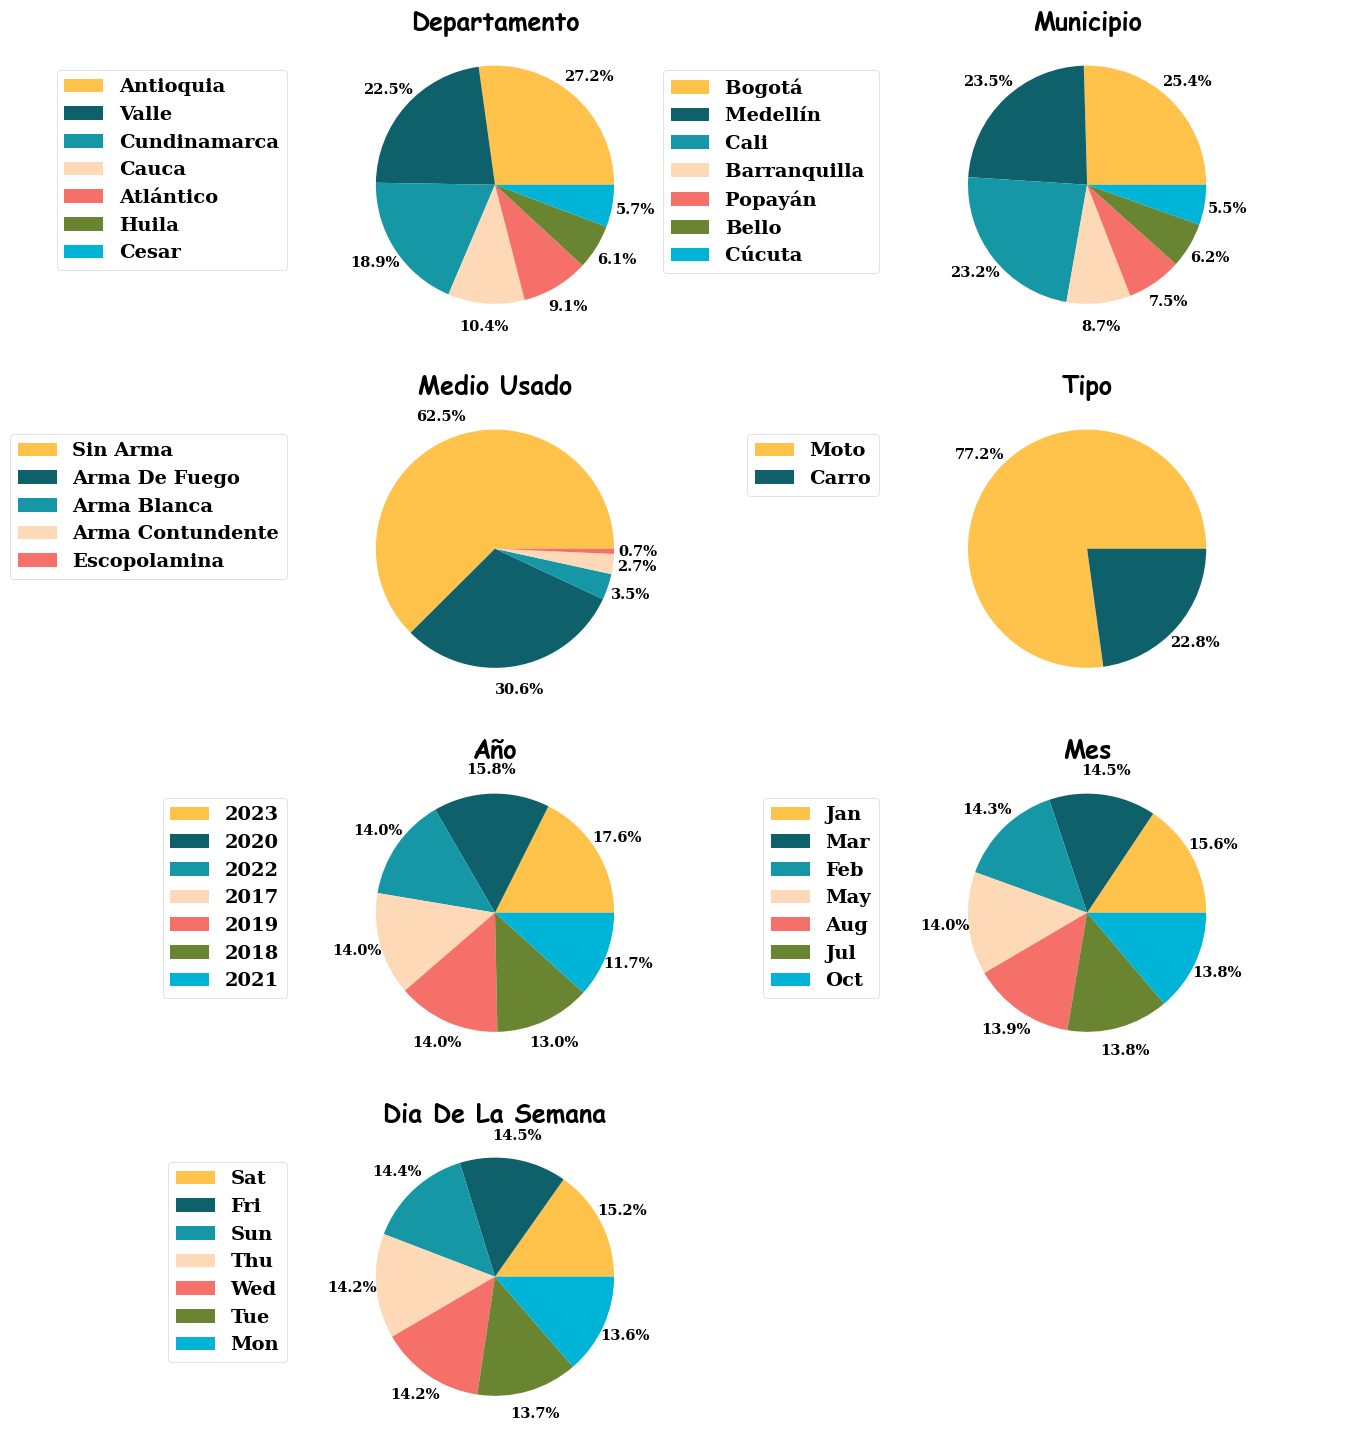

In [7]:
###Departamentos y ciudades con más robos, tipo de robos, medios de robo más usados, años con más robos

cat = df2.select_dtypes('object')

fig, ax = plt.subplots(figsize=(12,14),ncols=2,nrows=4)
fig.tight_layout(h_pad=6)
ax = ax.flat
colors = ['#ffc24b','#0e606b','#1697a6','#fed9b7','#f47068','#6a8532','#00b4d8']
ax[-1].axis(False)
for i, col in enumerate(cat):
    cat[col].value_counts(sort=True).head(7).plot(kind='pie',ax=ax[i], autopct='%.1f%%',
                                                  labeldistance=None,pctdistance=1.2,radius=1.2,colors=colors)
    ax[i].legend(bbox_to_anchor=(-.3,1))
    ax[i].set_ylabel('')
    ax[i].set_title(f'{col.title()}',fontfamily='cursive',y=1.09)

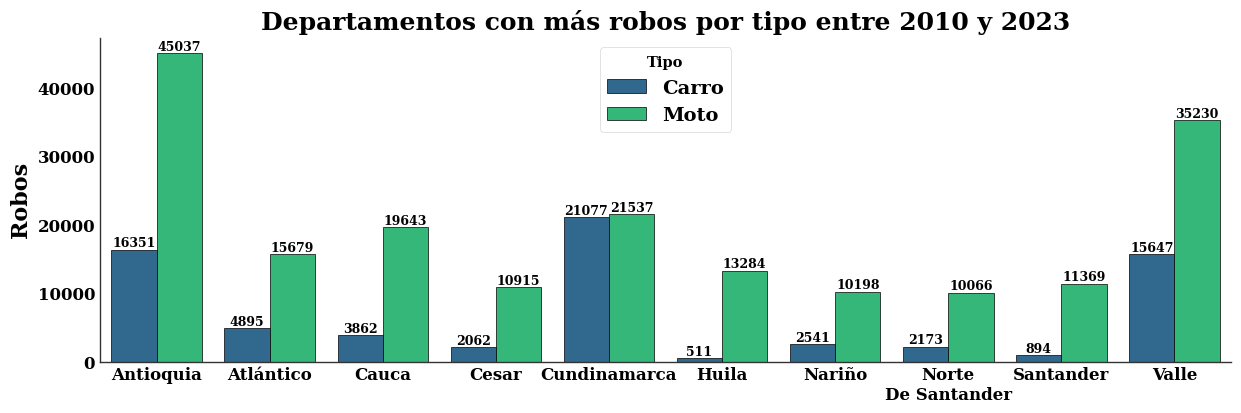

In [8]:
##Distribución de los robos por departamento
##Vamos a determinar en qué departamentos hay más robos

top_departamentos = df2.groupby('Departamento')['Medio usado'].count().reset_index().sort_values(by='Medio usado',ascending=False)['Departamento'].head(10)


robos_departamento = df2.loc[df2['Departamento'].isin(top_departamentos)].groupby(['Departamento','Tipo'])['Fecha'].count().reset_index()

fig, ax = plt.subplots(figsize=(13,4))
bar = sns.barplot(data=robos_departamento,x='Departamento',y='Fecha',hue='Tipo',palette='viridis',saturation=1,
                  edgecolor='k')
ax.set_title('Departamentos con más robos por tipo entre 2010 y 2023')
ax.spines[['top','right']].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('Robos')
x_labels = [i.replace(' ','\n',1) for i in robos_departamento['Departamento'].value_counts().index]
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)

for container in bar.containers:
    ax.bar_label(container,fmt=f'%.0f',fontsize=9)

plt.show()

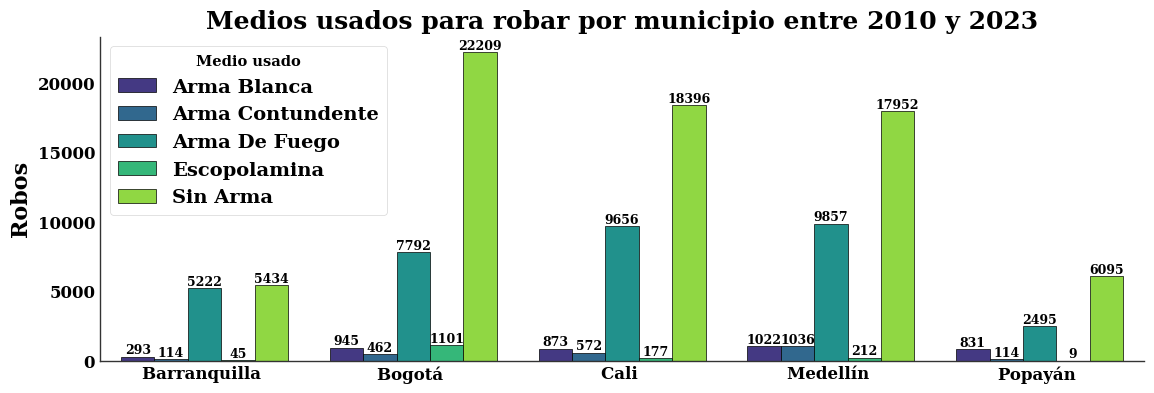

In [9]:
###Tipo de arma usada por ciudad

##Nuevamente queremos saber cuales son las ciudades con más robos.

top_ciudades = df2.groupby('Municipio')['Tipo'].count().reset_index().sort_values(by='Tipo',ascending=False)['Municipio'].head(5)

top_armas = df2.loc[df2['Municipio'].isin(top_ciudades)].groupby(['Municipio','Medio usado'])['Tipo'].count().reset_index()

fig, ax = plt.subplots(figsize=(12,4))

bar = sns.barplot(data=top_armas,x='Municipio',y='Tipo',hue='Medio usado',palette='viridis',saturation=1,edgecolor='k')
ax.set_title('Medios usados para robar por municipio entre 2010 y 2023')
ax.spines[['top','right']].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('Robos')


for container in bar.containers:
    ax.bar_label(container,fontsize=9)

plt.show()

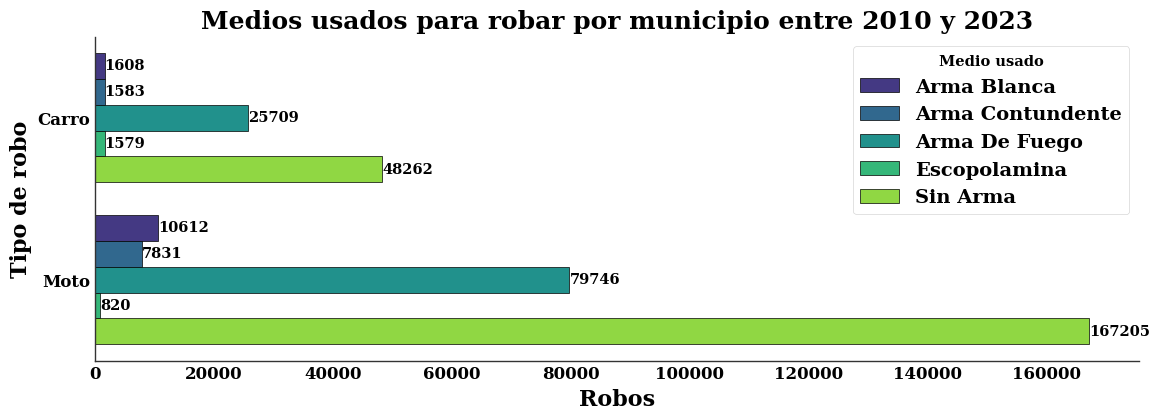

In [10]:
###Tipo de hurto por medio usado


tipo_medio = df2.groupby(['Tipo','Medio usado'])['Fecha'].count().reset_index()
fig, ax = plt.subplots(figsize=(12,4))
bar = sns.barplot(data=tipo_medio,y='Tipo',x='Fecha',orient='y',hue='Medio usado',palette='viridis',saturation=1,edgecolor='k')

for container in bar.containers:
    ax.bar_label(container)
ax.set_title('Medios usados para robar por municipio entre 2010 y 2023')
ax.spines[['top','right']].set_visible(False)
ax.set_xlabel('Robos')
ax.set_ylabel('Tipo de robo')

plt.show()

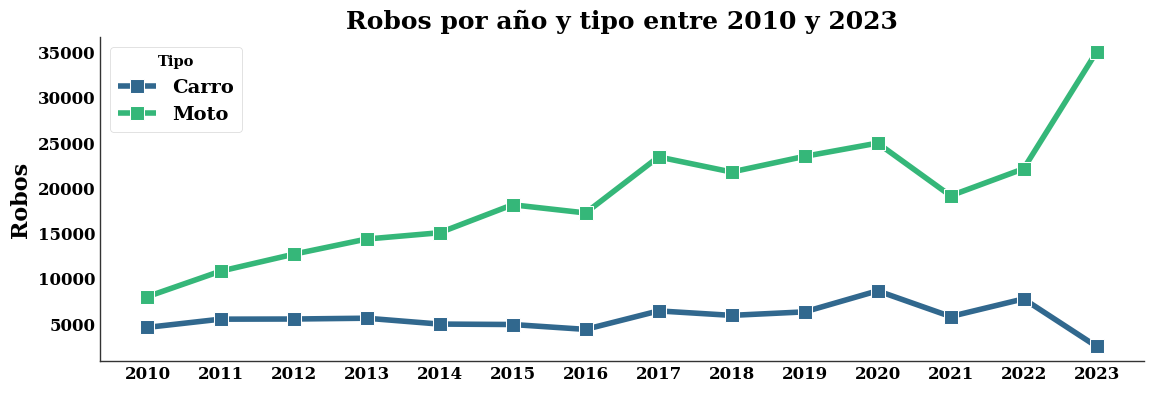

In [11]:
##Robos por año

fig, ax = plt.subplots(figsize=(12,4))

robos_año = df2.groupby(['Año','Tipo'])['Municipio'].count().reset_index()
robos_año
sns.lineplot(data=robos_año,x='Año',y='Municipio',hue='Tipo',marker='s',markersize=10,palette='viridis')

ax.set_title('Robos por año y tipo entre 2010 y 2023')
ax.spines[['top','right']].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('Robos')
plt.show()

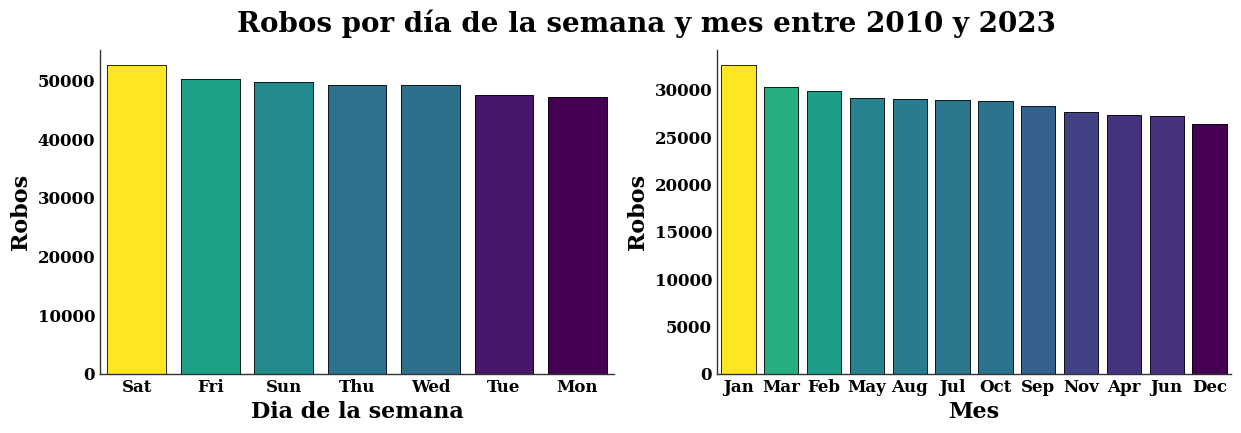

In [12]:
##Robos por día de la semana y por mes del año

fig, ax = plt.subplots(figsize=(13,4),ncols=2)
fig.suptitle('Robos por día de la semana y mes entre 2010 y 2023')
dia_semana = df2['Dia de la semana'].value_counts(sort=True).reset_index()
mes  = df2['Mes'].value_counts(sort=True).reset_index()

for i in range(2):
    sns.barplot(data=dia_semana,x='Dia de la semana',y='count',ax=ax[0],hue='count',legend=False,palette='viridis',saturation=1,edgecolor='k')
    sns.barplot(data=mes,x='Mes',y='count',ax=ax[1],hue='count',legend=False,palette='viridis',saturation=1,edgecolor='k')

    ax[i].spines[['top','right']].set_visible(False)
    ax[i].set_ylabel('Robos')
    

### Exportar datos para Power Bi

In [14]:
# #Solo trabajar con motos y con las ciudades con más robos

# motos = df2.loc[df2['Tipo']=='Moto']
# top_ciudades = motos['Municipio'].value_counts().head(10).index

# motos_final = motos.loc[motos['Municipio'].isin(top_ciudades)]
# motos_final.to_csv('hurto_motos_2010_2023.csv',encoding='utf-8-sig',index=None)

## Proceso de Machine Learning